 # Importing Libraries

In [49]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [6]:
df = pd.read_csv('NFLX_Stock - NFLX_Stock.csv.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj_close,Symbol,today_trend,tomorrow_trend,RSI,SMA,K
0,2016-01-07T00:00:00.000+02:00,122.180000,112.290001,116.360001,114.559998,33600000.0,114.559998,NFLX,Downtrend,Downtrend,81.331194,108.810001,55.749116
1,2016-01-08T00:00:00.000+02:00,117.720001,111.099999,116.330002,111.389999,18100000.0,111.389999,NFLX,Downtrend,Uptrend,64.896373,111.766668,37.340301
2,2016-01-11T00:00:00.000+02:00,116.790001,111.199997,112.129997,114.970001,21900000.0,114.970001,NFLX,Uptrend,Uptrend,53.842023,112.465000,58.130090
3,2016-01-12T00:00:00.000+02:00,117.779999,115.080002,116.110001,116.580002,15100000.0,116.580002,NFLX,Uptrend,Downtrend,61.288876,112.250000,67.479686
4,2016-01-13T00:00:00.000+02:00,114.480003,104.529999,114.430000,106.559998,24900000.0,106.559998,NFLX,Downtrend,Uptrend,63.907571,112.703333,11.501409


# Exploratory Data Analysis

In [7]:
df.shape

(1066, 13)

## Visualization

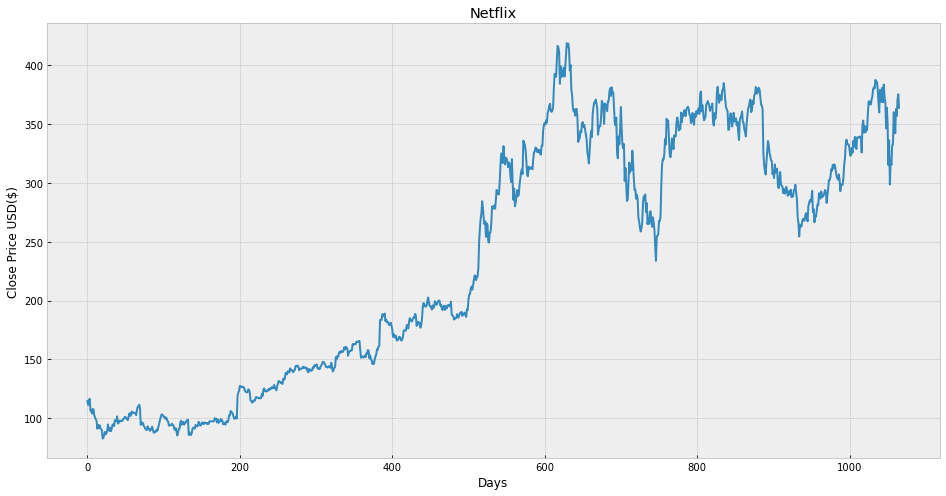

In [8]:
# visualize the close price data
plt.figure(figsize=(16,8))

plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')

plt.plot(df['Close'])
plt.show()

# Preprocessing Data


Foi decidido prever em cima do próprio valor close. <br>
Então, close foi copiado na coluna predição (subindo 25 linhas, pois queremos prever o 25 dia). <br>
Cria-se o X com valores do close que tem a previsão. <br>
Criase o Y com valores da previsão sem NaN values.<br>
O algoritmo cria uma relação do X com Y, ou seja, do valor atual com o valor daqui a 25 dias. <br>
Então, ele prevê, baseado no último valor do close, qual será o valor close no 25 dia.

In [9]:
# Get the close price
df = df[['Close']]
df.head()

,Close
0,114.559998
1,111.389999
2,114.970001
3,116.580002
4,106.559998


In [10]:
# Create a variable to predict 'x' days out into the future
future_days = 25

In [16]:
# Create a new column (target)shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head()

,Close,Prediction
0,114.559998,87.400002
1,111.389999,89.050003
2,114.970001,94.760002
3,116.580002,90.489998
4,106.559998,89.230003


In [17]:
df.tail()

,Close,Prediction
1061,362.989990,NaN
1062,357.119995,NaN
1063,370.959992,NaN
1064,375.500000,NaN
1065,364.079987,NaN


**visualization**

Does it make sense to predict based on the next 25th stock_price?

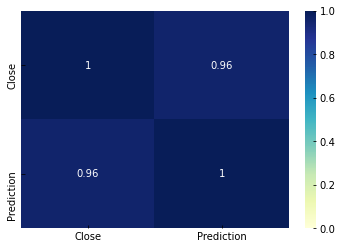

In [48]:
sns.heatmap(df[:-future_days].corr(), cmap="YlGnBu", annot=True, vmax=1, vmin=0)

Through the heatmap we can see a strong correlation between the current value of the stock price and the future value (in the next 25th day). So we can predict based on that.

In [19]:
# Create the feature dataset (x) and convert it to a numpy array and remove the last 'x' rows/days
x = np.array(df.drop(['Prediction'], 1))[:-future_days] # just the close column and removing -future_days
print(x)

[[114.5599976]
 [111.3899994]
 [114.9700012]
 ...
 [368.7000122]
 [360.0899963]
 [379.2399902]]


In [21]:
# Create the target dataset (y) and convert it to a numpy array and get all of the target values expect the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 87.40000153  89.05000305  94.76000214 ... 370.9599915  375.5
 364.0799866 ]


In [22]:
# Split the data into 75%training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Modeling

In [23]:
# create the models

# create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [50]:
# Get the last 'x' rows of the feature dataset that I have the prediction value
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

x_future

array([[326.       ],
       [349.6000061],
       [353.1600037],
       [342.8800049],
       [348.519989 ],
       [343.1600037],
       [347.7399902],
       [345.0899963],
       [358.       ],
       [369.0100098],
       [369.6700134],
       [366.9500122],
       [366.769989 ],
       [371.0700073],
       [373.6900024],
       [380.0100098],
       [381.3999939],
       [380.3999939],
       [387.7799988],
       [386.1900024],
       [386.       ],
       [380.0700073],
       [368.7000122],
       [360.0899963],
       [379.2399902]])

In [27]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[371.7099915 360.0850067 381.0499878 368.769989  383.7900085 348.4100037
 360.2999878 346.4899902 364.1300049 332.7000122 315.25      336.2999878
 298.8399963 319.75      315.4700012 332.0299988 332.8299866 360.269989
 357.3200073 362.9899902 362.9899902 357.1199951 377.0499878 375.5
 364.0799866]

[326.76216029 349.05948822 352.42298031 342.71041908 348.03908613
 342.97496244 347.30214187 344.7984229  356.99581746 367.39809439
 368.02166698 365.45180498 365.28171874 369.34438371 371.81975977
 377.79091405 379.10417351 378.15937172 385.13201354 383.6297821
 383.45026749 377.84759979 367.10520811 358.9704497  377.06339815]


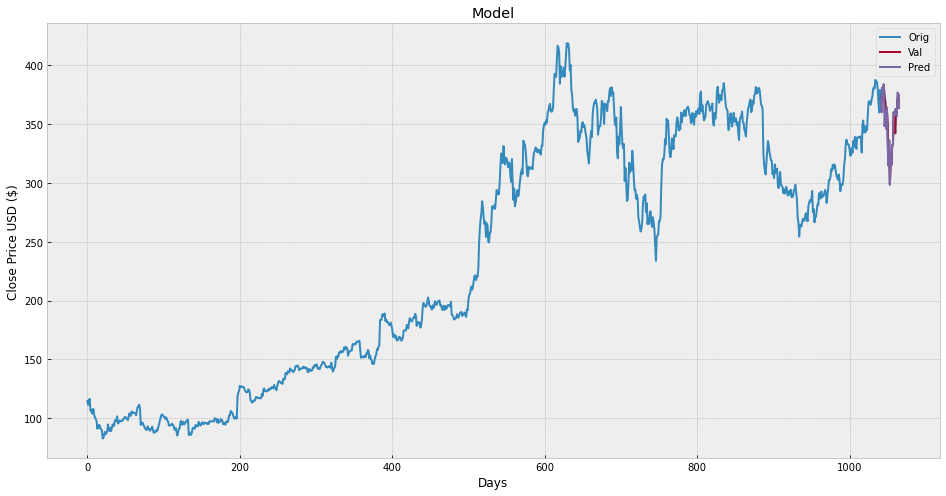

In [31]:
# Visualize the data
predictions = tree_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')

plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

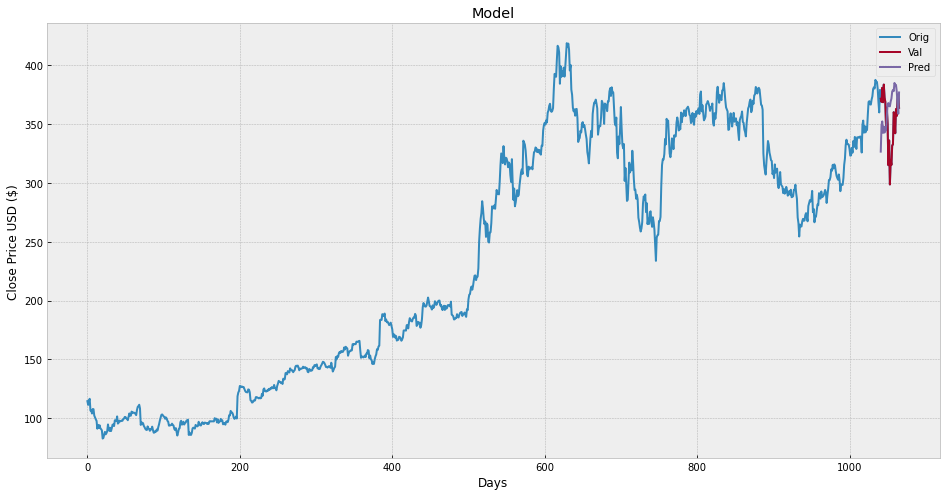

In [32]:
# Visualize the data
predictions = lr_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')

plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()